In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('Agg')

import sklearn
import imblearn
import us
    

from sklearn.metrics import *
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression as lor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

import catboost
from catboost import CatBoostClassifier
import seaborn as sns

from sklearn.model_selection import GridSearchCV


import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings("ignore")

# 1.1 Problem Objective and Data Brief

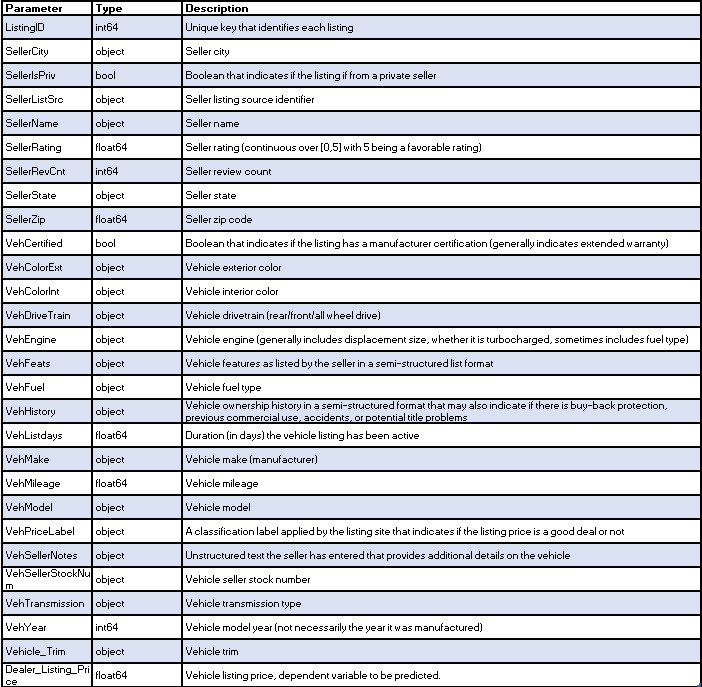

# 1.2 Data Load Steps

In [49]:
path_m = os.getcwd()

In [50]:
def dir_up(path,n):
    for _ in range(n):
        path = dir_up(path.rpartition("\\")[0], 0)
    return(path)

In [51]:
path_d = os.path.join(dir_up(path_m,1),'Data')
df_actual = pd.read_csv(os.path.join(path_d,'Training_DataSet.csv'))
df_actual = df_actual

In [52]:
print("A snapshot of the data looks like this - ")
df_actual.head()

A snapshot of the data looks like this - 


,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [53]:
print("The data contains the following columns:\n\n",np.array(df_actual.columns))

The data contains the following columns:

 ['ListingID' 'SellerCity' 'SellerIsPriv' 'SellerListSrc' 'SellerName'
 'SellerRating' 'SellerRevCnt' 'SellerState' 'SellerZip' 'VehBodystyle'
 'VehCertified' 'VehColorExt' 'VehColorInt' 'VehDriveTrain' 'VehEngine'
 'VehFeats' 'VehFuel' 'VehHistory' 'VehListdays' 'VehMake' 'VehMileage'
 'VehModel' 'VehPriceLabel' 'VehSellerNotes' 'VehType' 'VehTransmission'
 'VehYear' 'Vehicle_Trim' 'Dealer_Listing_Price']


# 1.3 Data Manipulation and Functions

In [54]:
#df_actual = df_actual.set_index('ListingID')

In [55]:
varlist = ['ListingID','SellerState', 'SellerIsPriv', 'SellerListSrc',\
            'VehCertified', 'VehDriveTrain', 'VehFuel', 'VehMake', 'VehModel',\
            'VehPriceLabel', 'VehYear', 'VehMileage', 'SellerRating',\
           'SellerRevCnt', 'VehListdays','Vehicle_Trim']

In [56]:
df_actual = df_actual[varlist]
df_actual.isna().sum()

ListingID          0
SellerState        0
SellerIsPriv       0
SellerListSrc      2
VehCertified       0
VehDriveTrain    401
VehFuel            2
VehMake            0
VehModel           0
VehPriceLabel    285
VehYear            0
VehMileage         2
SellerRating       0
SellerRevCnt       0
VehListdays        2
Vehicle_Trim     405
dtype: int64

In [57]:
df_actual.shape

(6298, 16)

In [58]:
df_actual = df_actual[~(df_actual.Vehicle_Trim.isna())]

In [59]:
df_actual.shape

(5893, 16)

In [60]:
df_actual[varlist].isna().sum()

ListingID          0
SellerState        0
SellerIsPriv       0
SellerListSrc      2
VehCertified       0
VehDriveTrain     68
VehFuel            2
VehMake            0
VehModel           0
VehPriceLabel    285
VehYear            0
VehMileage         2
SellerRating       0
SellerRevCnt       0
VehListdays        2
Vehicle_Trim       0
dtype: int64

### 1.3.1 Data Aggregation functions

In [61]:
## Seller State

def sellerstate(df):
    states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}
    
    sr_df = pd.DataFrame(states_to_regions,index=[0])
    sr_df = sr_df.T.reset_index()
    sr_df.columns = ['States','Region']
    
    ## importing us package
    

    s_df = us.states.mapping('abbr', 'name')
    s_df = pd.DataFrame(s_df,index=[0])
    s_df2 = s_df.T.reset_index()
    s_df2.columns=['Abbr','States']
    
    revised_region = pd.merge(s_df2,sr_df,on='States',how='inner')
    revised_region = revised_region[['Abbr','Region']]
    revised_region.columns = ['SellerState','Region']
    
    df = pd.merge(df,revised_region,how='inner',on='SellerState')
    
    df = df.drop(['SellerState'], axis=1)
    
    return df
    
    

In [62]:
df_actual_r = sellerstate(df_actual)
df_actual_r.shape

(5893, 16)

In [63]:
df_actual_r.columns

Index(['ListingID', 'SellerIsPriv', 'SellerListSrc', 'VehCertified',
       'VehDriveTrain', 'VehFuel', 'VehMake', 'VehModel', 'VehPriceLabel',
       'VehYear', 'VehMileage', 'SellerRating', 'SellerRevCnt', 'VehListdays',
       'Vehicle_Trim', 'Region'],
      dtype='object')

In [64]:
## SellerisPriv

def sellerisPriv(df):
    df['SellerIsPriv'] = df['SellerIsPriv'] * 1
    return df
    

In [65]:
df_actual_r = sellerisPriv(df_actual_r)
df_actual_r.head(2)

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehYear,VehMileage,SellerRating,SellerRevCnt,VehListdays,Vehicle_Trim,Region
0,3287,0,Inventory Command Center,False,4X4,Gasoline,Jeep,Grand Cherokee,Fair Price,2015,39319.0,5.0,32,8.600069,High Altitude,Midwest
1,38149,0,Digital Motorworks (DMi),False,4WD,Gasoline,Jeep,Grand Cherokee,Good Deal,2015,35990.0,4.9,865,18.920764,Summit,Midwest


In [66]:
## VehCertified

def vehcertified(df):
    df['VehCertified'] = df['VehCertified'] * 1
    return df

In [67]:
df_actual_r = vehcertified(df_actual_r)
df_actual_r.head(2)

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehYear,VehMileage,SellerRating,SellerRevCnt,VehListdays,Vehicle_Trim,Region
0,3287,0,Inventory Command Center,0,4X4,Gasoline,Jeep,Grand Cherokee,Fair Price,2015,39319.0,5.0,32,8.600069,High Altitude,Midwest
1,38149,0,Digital Motorworks (DMi),0,4WD,Gasoline,Jeep,Grand Cherokee,Good Deal,2015,35990.0,4.9,865,18.920764,Summit,Midwest


In [69]:
## VehDriveTrain

def vehdrivetrain(df):
    df['VehDriveTrain'] = df.apply(lambda row: 'AWD' if row['VehDriveTrain'] in (['4X4', '4WD', 'AWD', 'AWD or 4x4','4x4/4-wheel drive','Four Wheel Drive', '4x4/4WD', '4x4', 'All Wheel Drive','All-wheel Drive','ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL','AllWheelDrive', '4WD/AWD','ALL WHEEL']) else 'FWD' if row['VehDriveTrain'] in (['2WD','Front-wheel Drive','Front Wheel Drive','FWD']) else row['VehDriveTrain'],axis=1)
    return df

In [70]:
df_actual_r = vehdrivetrain(df_actual_r)
df_actual_r.head(2)

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehYear,VehMileage,SellerRating,SellerRevCnt,VehListdays,Vehicle_Trim,Region
0,3287,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Fair Price,2015,39319.0,5.0,32,8.600069,High Altitude,Midwest
1,38149,0,Digital Motorworks (DMi),0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,2015,35990.0,4.9,865,18.920764,Summit,Midwest


In [71]:
df_actual_r.VehYear.unique()

array([2015, 2017, 2018, 2016, 2019], dtype=int64)

In [72]:
## VehYear

def vehTenure(df):
    df['VehTenure'] = df.apply(lambda row: 2023-row['VehYear'],axis=1)
    df = df.drop('VehYear',axis=1)
    return df

In [73]:
df_actual_r = vehTenure(df_actual_r)
df_actual_r.head(2)

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehMileage,SellerRating,SellerRevCnt,VehListdays,Vehicle_Trim,Region,VehTenure
0,3287,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Fair Price,39319.0,5.0,32,8.600069,High Altitude,Midwest,8
1,38149,0,Digital Motorworks (DMi),0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,35990.0,4.9,865,18.920764,Summit,Midwest,8


In [74]:
def vehTrim(df):
    df['Vehicle_Trim'] = df.apply(lambda row: 'Limited' if row['Vehicle_Trim'] in (['Laredo','Limited','Limited 4x4','FWD','SRT','Trailhawk','Laredo E','Trackhawk','75th Anniversary','SRT Night','Limited 75th Anniversary Edition','75th Anniversary Edition','Limited 75th Anniversary','Upland','Limited X']) else 'Luxury',axis=1)
    return df

In [75]:
df_actual_r = vehTrim(df_actual_r)
df_actual_r.head(2)

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehMileage,SellerRating,SellerRevCnt,VehListdays,Vehicle_Trim,Region,VehTenure
0,3287,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Fair Price,39319.0,5.0,32,8.600069,Premium Luxury,Midwest,8
1,38149,0,Digital Motorworks (DMi),0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,35990.0,4.9,865,18.920764,Premium Luxury,Midwest,8


### 1.3.2 Imputing Missing Values Functions

In [76]:
##impute missing values in Train data

## categorical variables

def missing_vcat(df,col):
    df_grouped = pd.DataFrame(df[col].value_counts()).reset_index()
    mode_val = df_grouped['index'][0]
    df[col] = df[col].fillna(mode_val)
    return df


## continuous variables

def missing_vcont(df,col):
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    return df
    

In [77]:
df_actual_r = df_actual_r.set_index('ListingID')

In [78]:
df_actual_r = df_actual_r[['SellerIsPriv', 'SellerListSrc', 'VehCertified', 'VehDriveTrain',\
               'VehFuel', 'VehMake', 'VehModel', 'VehPriceLabel', 'VehMileage',\
               'SellerRating', 'SellerRevCnt', 'VehListdays', 'VehTenure', 'Region',\
               'Vehicle_Trim']]

### 1.3.3 Imputing Missing Values

In [79]:
df_revised= missing_vcat(df_actual_r,'SellerListSrc')

df_revised = missing_vcat(df_actual_r,'VehDriveTrain')

df_revised = missing_vcat(df_actual_r,'VehFuel')

df_revised = missing_vcat(df_actual_r,'VehPriceLabel')

df_revised = missing_vcont(df_actual_r,'VehMileage')

df_revised= missing_vcont(df_actual_r,'VehListdays')

df_revised.head()

,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehMileage,SellerRating,SellerRevCnt,VehListdays,VehTenure,Region,Vehicle_Trim
ListingID,,,,,,,,,,,,,,,
3287,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Fair Price,39319.0,5.0,32,8.600069,8,Midwest,Premium Luxury
38149,0,Digital Motorworks (DMi),0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,35990.0,4.9,865,18.920764,8,Midwest,Premium Luxury
38723,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,12912.0,4.7,107,73.766007,6,Midwest,Limited
90916,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,12589.0,4.7,107,95.771343,6,Midwest,Limited
105329,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,36599.0,4.7,107,98.772870,8,Midwest,Premium Luxury


In [80]:
### One hot encoding categorical variables

def get_dummies(df, col):
    dummy_df = pd.get_dummies(df[col], drop_first=False,prefix=col)
    return dummy_df

In [81]:
## Train data dummies

sls_dummy = get_dummies(df_revised, 'SellerListSrc')
vdt_dummy = get_dummies(df_revised, 'VehDriveTrain')
vf_dummy = get_dummies(df_revised, 'VehFuel')
vm_dummy = get_dummies(df_revised, 'VehMake')
vmo_dummy = get_dummies(df_revised, 'VehModel')
vp_dummy = get_dummies(df_revised, 'VehPriceLabel')
r_dummy = get_dummies(df_revised, 'Region')


df_model = pd.concat([sls_dummy, vdt_dummy, vf_dummy, vm_dummy, vmo_dummy, vp_dummy, r_dummy, df_revised[['SellerIsPriv', 'VehCertified', 'VehMileage', 'SellerRating', 'SellerRevCnt', 'VehListdays', 'VehTenure','Vehicle_Trim']]], axis=1)

df_model.head()

,SellerListSrc_Digital Motorworks (DMi),SellerListSrc_HomeNet Automotive,SellerListSrc_Inventory Command Center,SellerListSrc_Jeep Certified Program,SellerListSrc_My Dealer Center,SellerListSrc_Sell It Yourself,VehDriveTrain_AWD,VehDriveTrain_FWD,VehFuel_Diesel,VehFuel_E85 Flex Fuel,...,Region_Southwest,Region_West,SellerIsPriv,VehCertified,VehMileage,SellerRating,SellerRevCnt,VehListdays,VehTenure,Vehicle_Trim
ListingID,,,,,,,,,,,,,,,,,,,,,
3287,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,39319.0,5.0,32,8.600069,8,Premium Luxury
38149,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,35990.0,4.9,865,18.920764,8,Premium Luxury
38723,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,12912.0,4.7,107,73.766007,6,Limited
90916,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,12589.0,4.7,107,95.771343,6,Limited
105329,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,36599.0,4.7,107,98.772870,8,Premium Luxury


In [84]:
df_model['Vehicle_Trim'] = df_model['Vehicle_Trim'].map({'Limited':1,'Luxury':0})

In [85]:
df_model.head()

,SellerListSrc_Digital Motorworks (DMi),SellerListSrc_HomeNet Automotive,SellerListSrc_Inventory Command Center,SellerListSrc_Jeep Certified Program,SellerListSrc_My Dealer Center,SellerListSrc_Sell It Yourself,VehDriveTrain_AWD,VehDriveTrain_FWD,VehFuel_Diesel,VehFuel_E85 Flex Fuel,...,Region_Southwest,Region_West,SellerIsPriv,VehCertified,VehMileage,SellerRating,SellerRevCnt,VehListdays,VehTenure,Vehicle_Trim
ListingID,,,,,,,,,,,,,,,,,,,,,
3287,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,39319.0,5.0,32,8.600069,8,0
38149,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,35990.0,4.9,865,18.920764,8,0
38723,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,12912.0,4.7,107,73.766007,6,1
90916,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,12589.0,4.7,107,95.771343,6,1
105329,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,36599.0,4.7,107,98.772870,8,0


## 1.4 EDA on the dataset

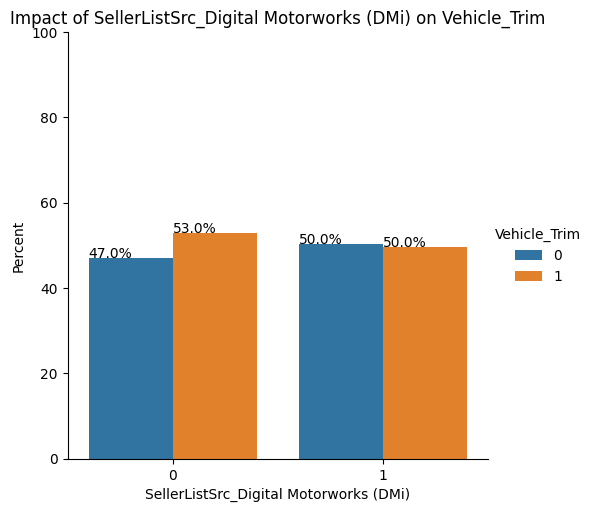

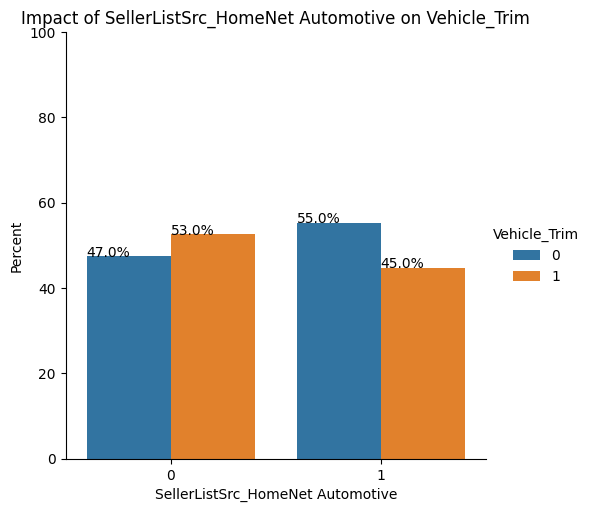

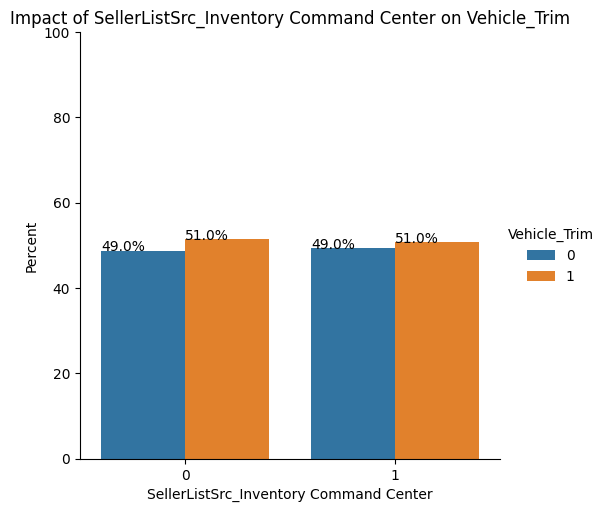

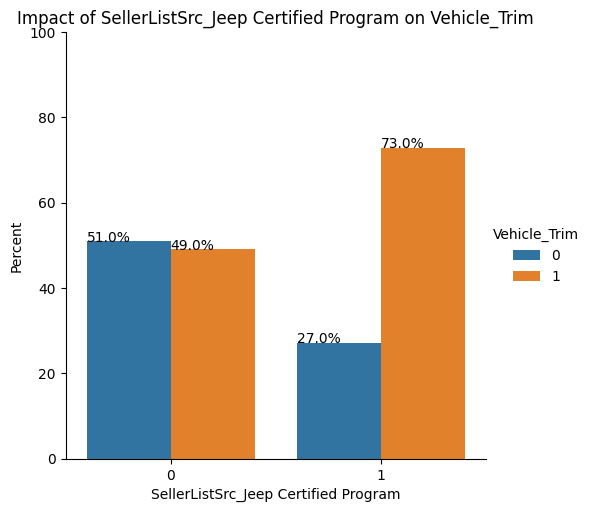

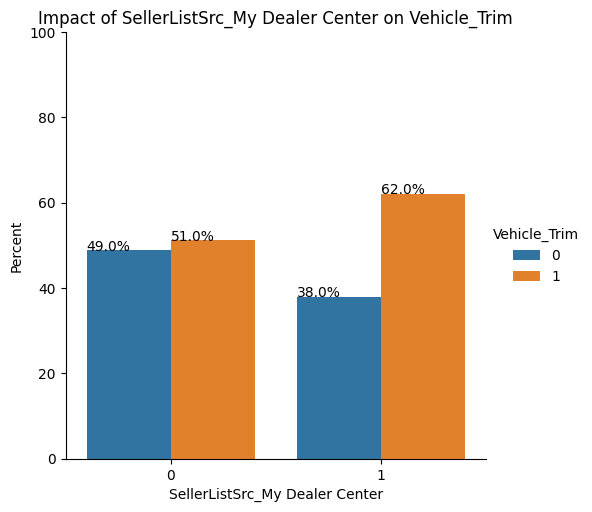

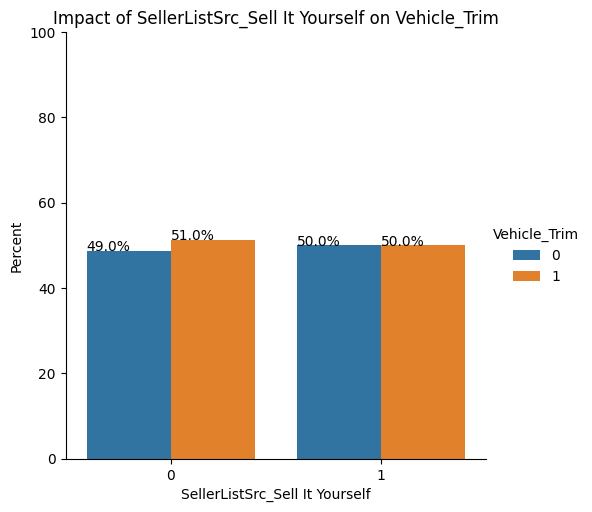

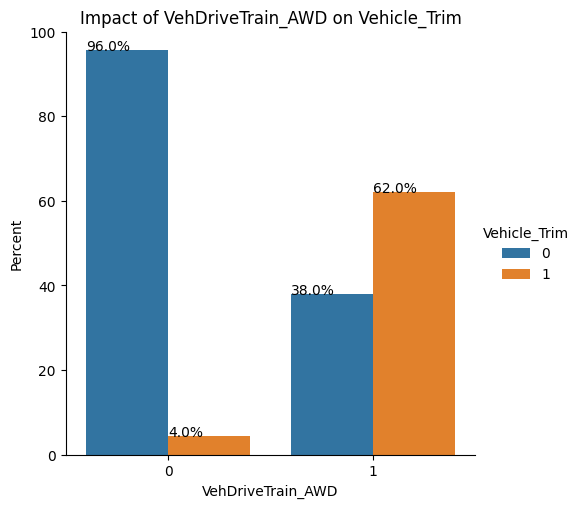

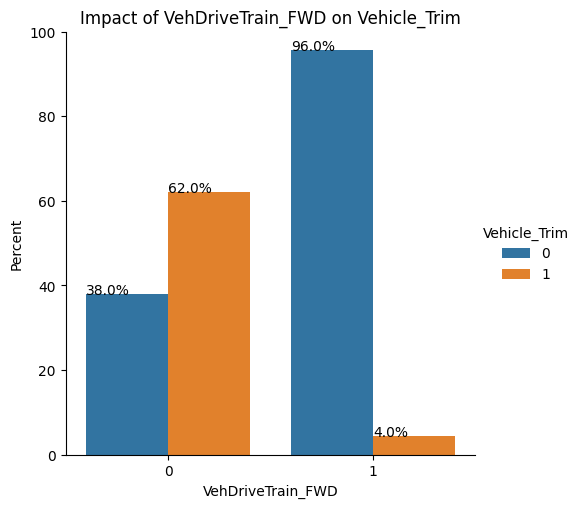

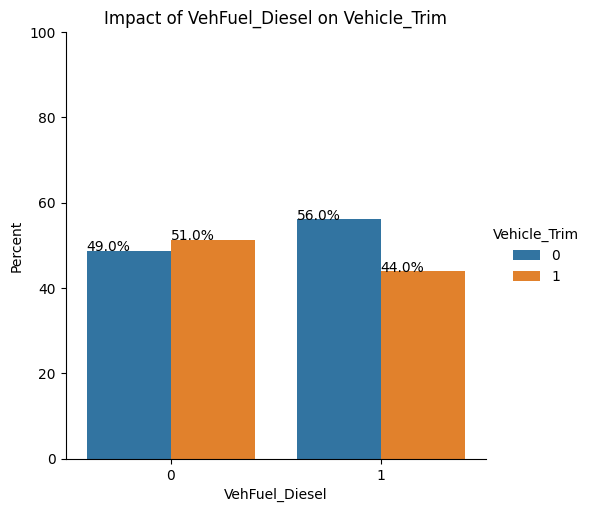

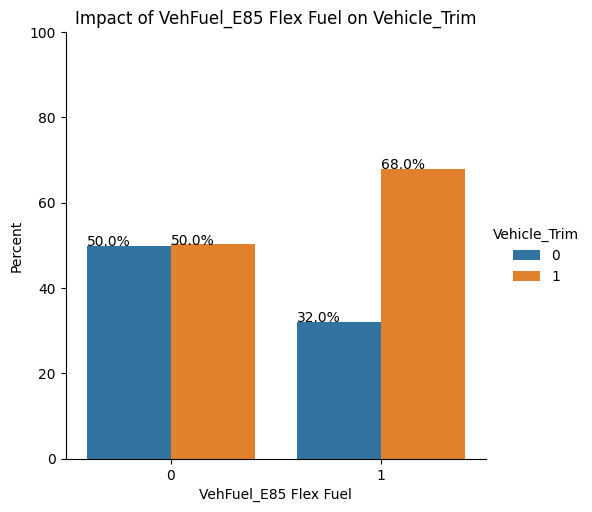

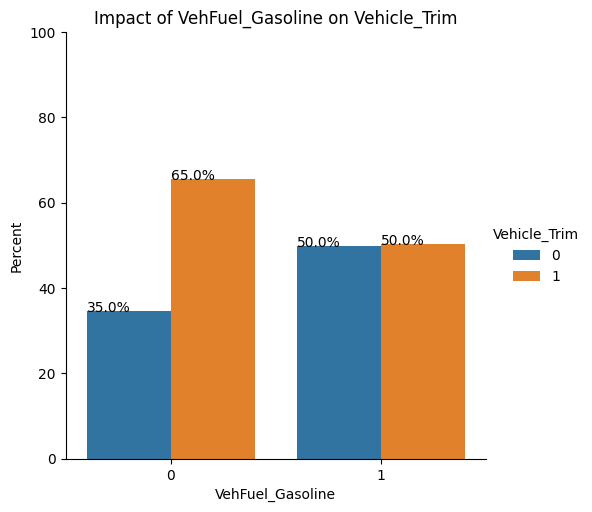

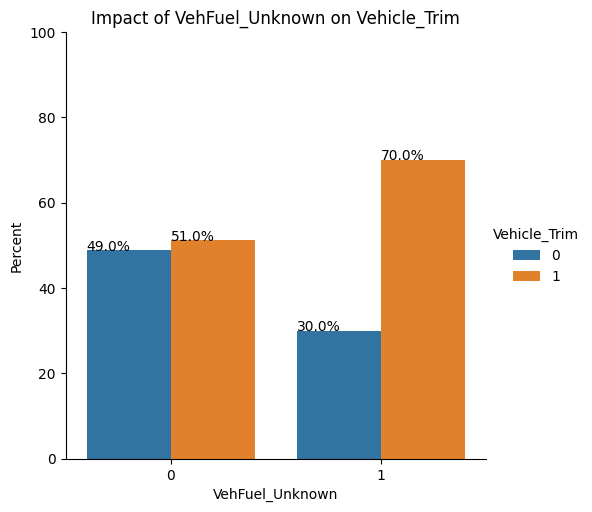

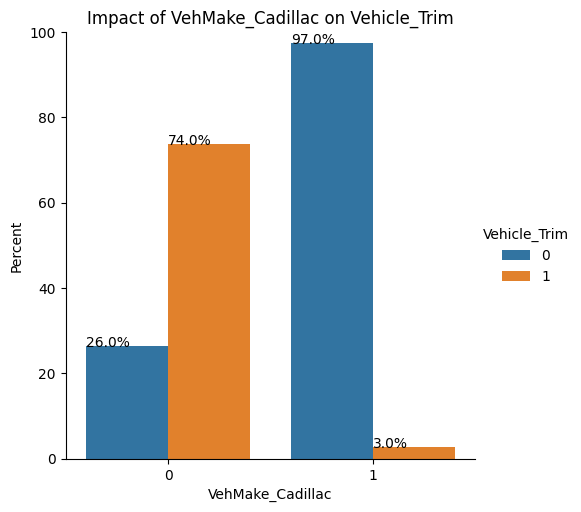

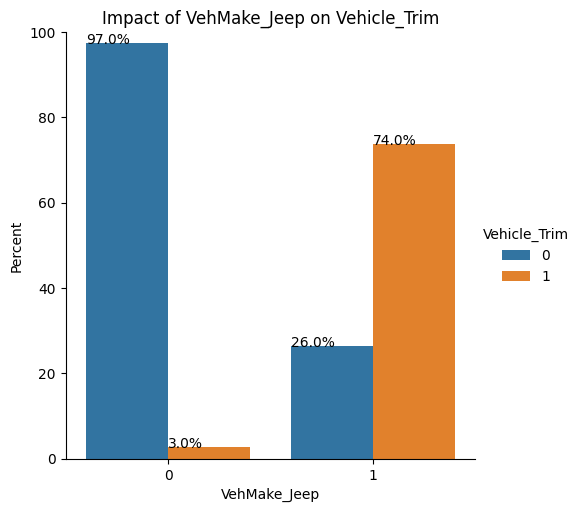

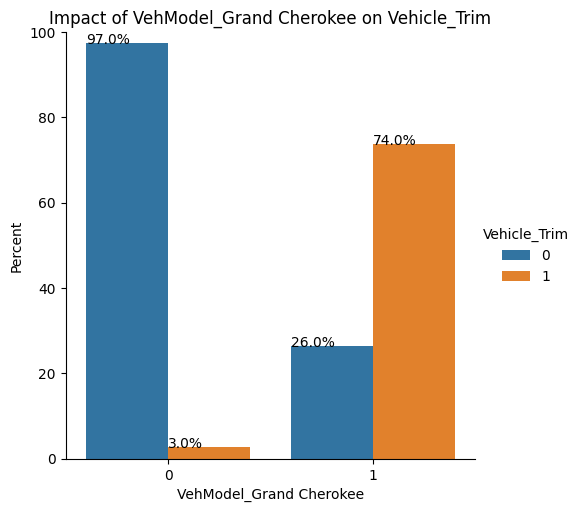

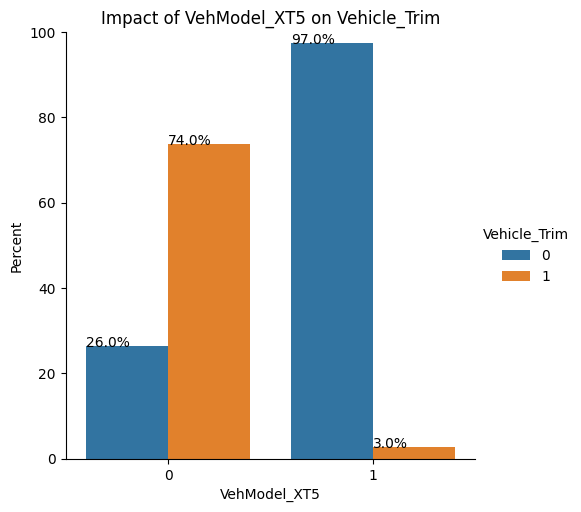

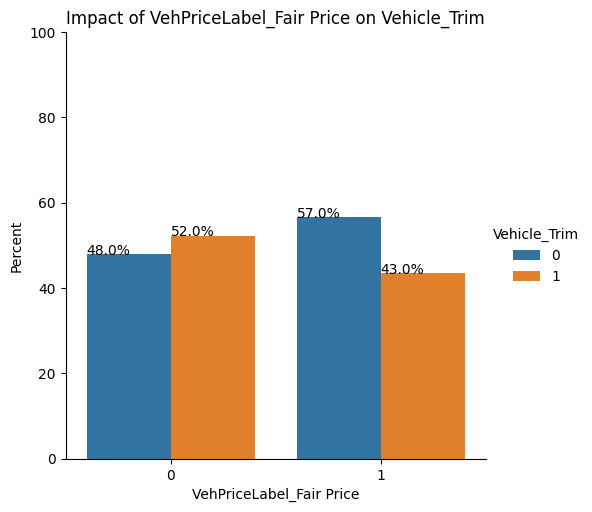

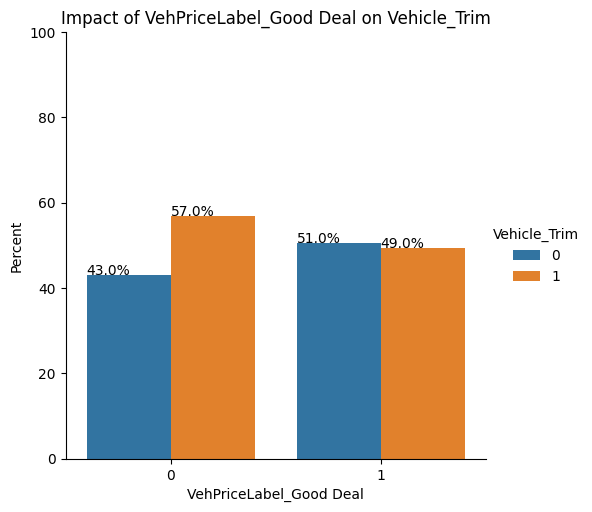

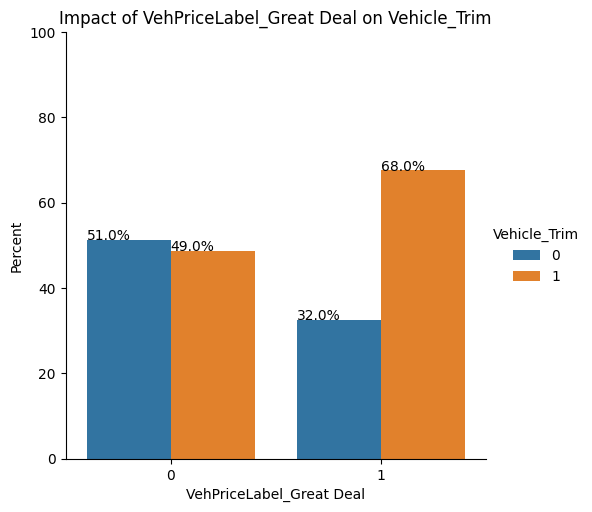

In [159]:
for col in df_model.columns[:19]:
    new_df = df_model.groupby(col)['Vehicle_Trim'].value_counts(normalize=True)
    new_df = new_df.mul(100).rename('Percent').reset_index()
    pl = sns.catplot(x=col, y='Percent', hue='Vehicle_Trim', kind='bar', data=new_df)
    pl.ax.set_ylim(0,100)
    plt.title("Impact of {} on Vehicle_Trim".format(col))
    
    for p in pl.ax.patches:
        txt = str(p.get_height().round(0)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        pl.ax.text(txt_x,txt_y,txt)
    
    plt.show()

### Conclusion

Initial analysis shows the following variables are really significant in determining the Vehicle Trim of the corresponding Listing :-

SellerListSrs_HomeNet Automotive, SellerListSrs_Jeep Certified Program, SellerListSrs_My Dealer Center, 
VehDriveTrain_AWD, VehDriveTrain_FWD, VehFuel_Diesel, VehFuel_E85 Flex Fuel, VehFuel_Gasoline,
VehFuel_Unknown, VehMake_Cadillac, VehMake_Jeep, VehModel_Grand Cherokee, VehMake_XT5, VehPriceLabel_Great Deal

## 1.5 Divide data into train and test set

In [86]:
df_model.columns

Index(['SellerListSrc_Digital Motorworks (DMi)',
       'SellerListSrc_HomeNet Automotive',
       'SellerListSrc_Inventory Command Center',
       'SellerListSrc_Jeep Certified Program',
       'SellerListSrc_My Dealer Center', 'SellerListSrc_Sell It Yourself',
       'VehDriveTrain_AWD', 'VehDriveTrain_FWD', 'VehFuel_Diesel',
       'VehFuel_E85 Flex Fuel', 'VehFuel_Gasoline', 'VehFuel_Unknown',
       'VehMake_Cadillac', 'VehMake_Jeep', 'VehModel_Grand Cherokee',
       'VehModel_XT5', 'VehPriceLabel_Fair Price', 'VehPriceLabel_Good Deal',
       'VehPriceLabel_Great Deal', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_Southwest', 'Region_West', 'SellerIsPriv',
       'VehCertified', 'VehMileage', 'SellerRating', 'SellerRevCnt',
       'VehListdays', 'VehTenure', 'Vehicle_Trim'],
      dtype='object')

In [87]:
X = df_model.iloc[:,:df_model.shape[1]-1]

In [88]:
Y = df_model.iloc[:,df_model.shape[1]-1:df_model.shape[1]]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state = 42)

In [102]:
print ('In training data, X variables contain {} rows and columns respectively and Y variable contain {} rows and columns respectively '.format(X_train.shape, y_train.shape))
print ('In test data, X variables contain {} rows and columns respectively and Y variable contain {} rows and columns respectively '.format(X_test.shape, y_test.shape))


print('In training data the percentage of listings with vehice trim as Limited :', len(y_train[y_train['Vehicle_Trim']==1])/len(y_train)*100)
print('In training data the percentage of listings with vehice trim as Luxury :', len(y_train[y_train['Vehicle_Trim']==0])/len(y_train)*100)

print('In test data the percentage of listings with vehice trim as Limited :', len(y_test[y_test['Vehicle_Trim']==1])/len(y_test)*100)
print('In test data the percentage of listings with vehice trim as Luxury :', len(y_test[y_test['Vehicle_Trim']==0])/len(y_test)*100)

print('Our training data is highly imbalanced')
#print (X_test.shape, y_test.shape)

In training data, X variables contain (4125, 31) rows and columns respectively and Y variable contain (4125, 1) rows and columns respectively 
In test data, X variables contain (1768, 31) rows and columns respectively and Y variable contain (1768, 1) rows and columns respectively 
In training data the percentage of listings with vehice trim as Limited : 50.71515151515151
In training data the percentage of listings with vehice trim as Luxury : 49.28484848484849
In test data the percentage of listings with vehice trim as Limited : 52.43212669683258
In test data the percentage of listings with vehice trim as Luxury : 47.56787330316742
Our training data is highly imbalanced


In [91]:
X_train.isna().sum()

SellerListSrc_Digital Motorworks (DMi)    0
SellerListSrc_HomeNet Automotive          0
SellerListSrc_Inventory Command Center    0
SellerListSrc_Jeep Certified Program      0
SellerListSrc_My Dealer Center            0
SellerListSrc_Sell It Yourself            0
VehDriveTrain_AWD                         0
VehDriveTrain_FWD                         0
VehFuel_Diesel                            0
VehFuel_E85 Flex Fuel                     0
VehFuel_Gasoline                          0
VehFuel_Unknown                           0
VehMake_Cadillac                          0
VehMake_Jeep                              0
VehModel_Grand Cherokee                   0
VehModel_XT5                              0
VehPriceLabel_Fair Price                  0
VehPriceLabel_Good Deal                   0
VehPriceLabel_Great Deal                  0
Region_Midwest                            0
Region_Northeast                          0
Region_South                              0
Region_Southwest                

## 1.6 Base Model

In [95]:
## Create a Random Forest Classifier

base_rfm = RandomForestClassifier(random_state=42)

In [170]:
## Fit the model on the Training data

base_model = base_rfm.fit(X_train, y_train)


features = {}
for feature, importance in zip(X_train.columns, base_rfm.feature_importances_):
    features[feature] = importance
importances = pd.DataFrame.from_dict(features, orient='index').rename(columns={0: 'Gini-imp'})
#importances.sort_values(by='Gini-imp')[::-1][:10].plot(kind='barh')
importances.sort_values(by='Gini-imp',ascending=False)

,Gini-imp
VehMileage,0.133533
VehMake_Jeep,0.119646
VehListdays,0.119379
SellerRevCnt,0.098344
VehModel_Grand Cherokee,0.097099
VehMake_Cadillac,0.089318
VehModel_XT5,0.075271
SellerRating,0.066805
VehTenure,0.044473
VehDriveTrain_AWD,0.022431


### 1.7  Association Matrix by Cramer's V formula

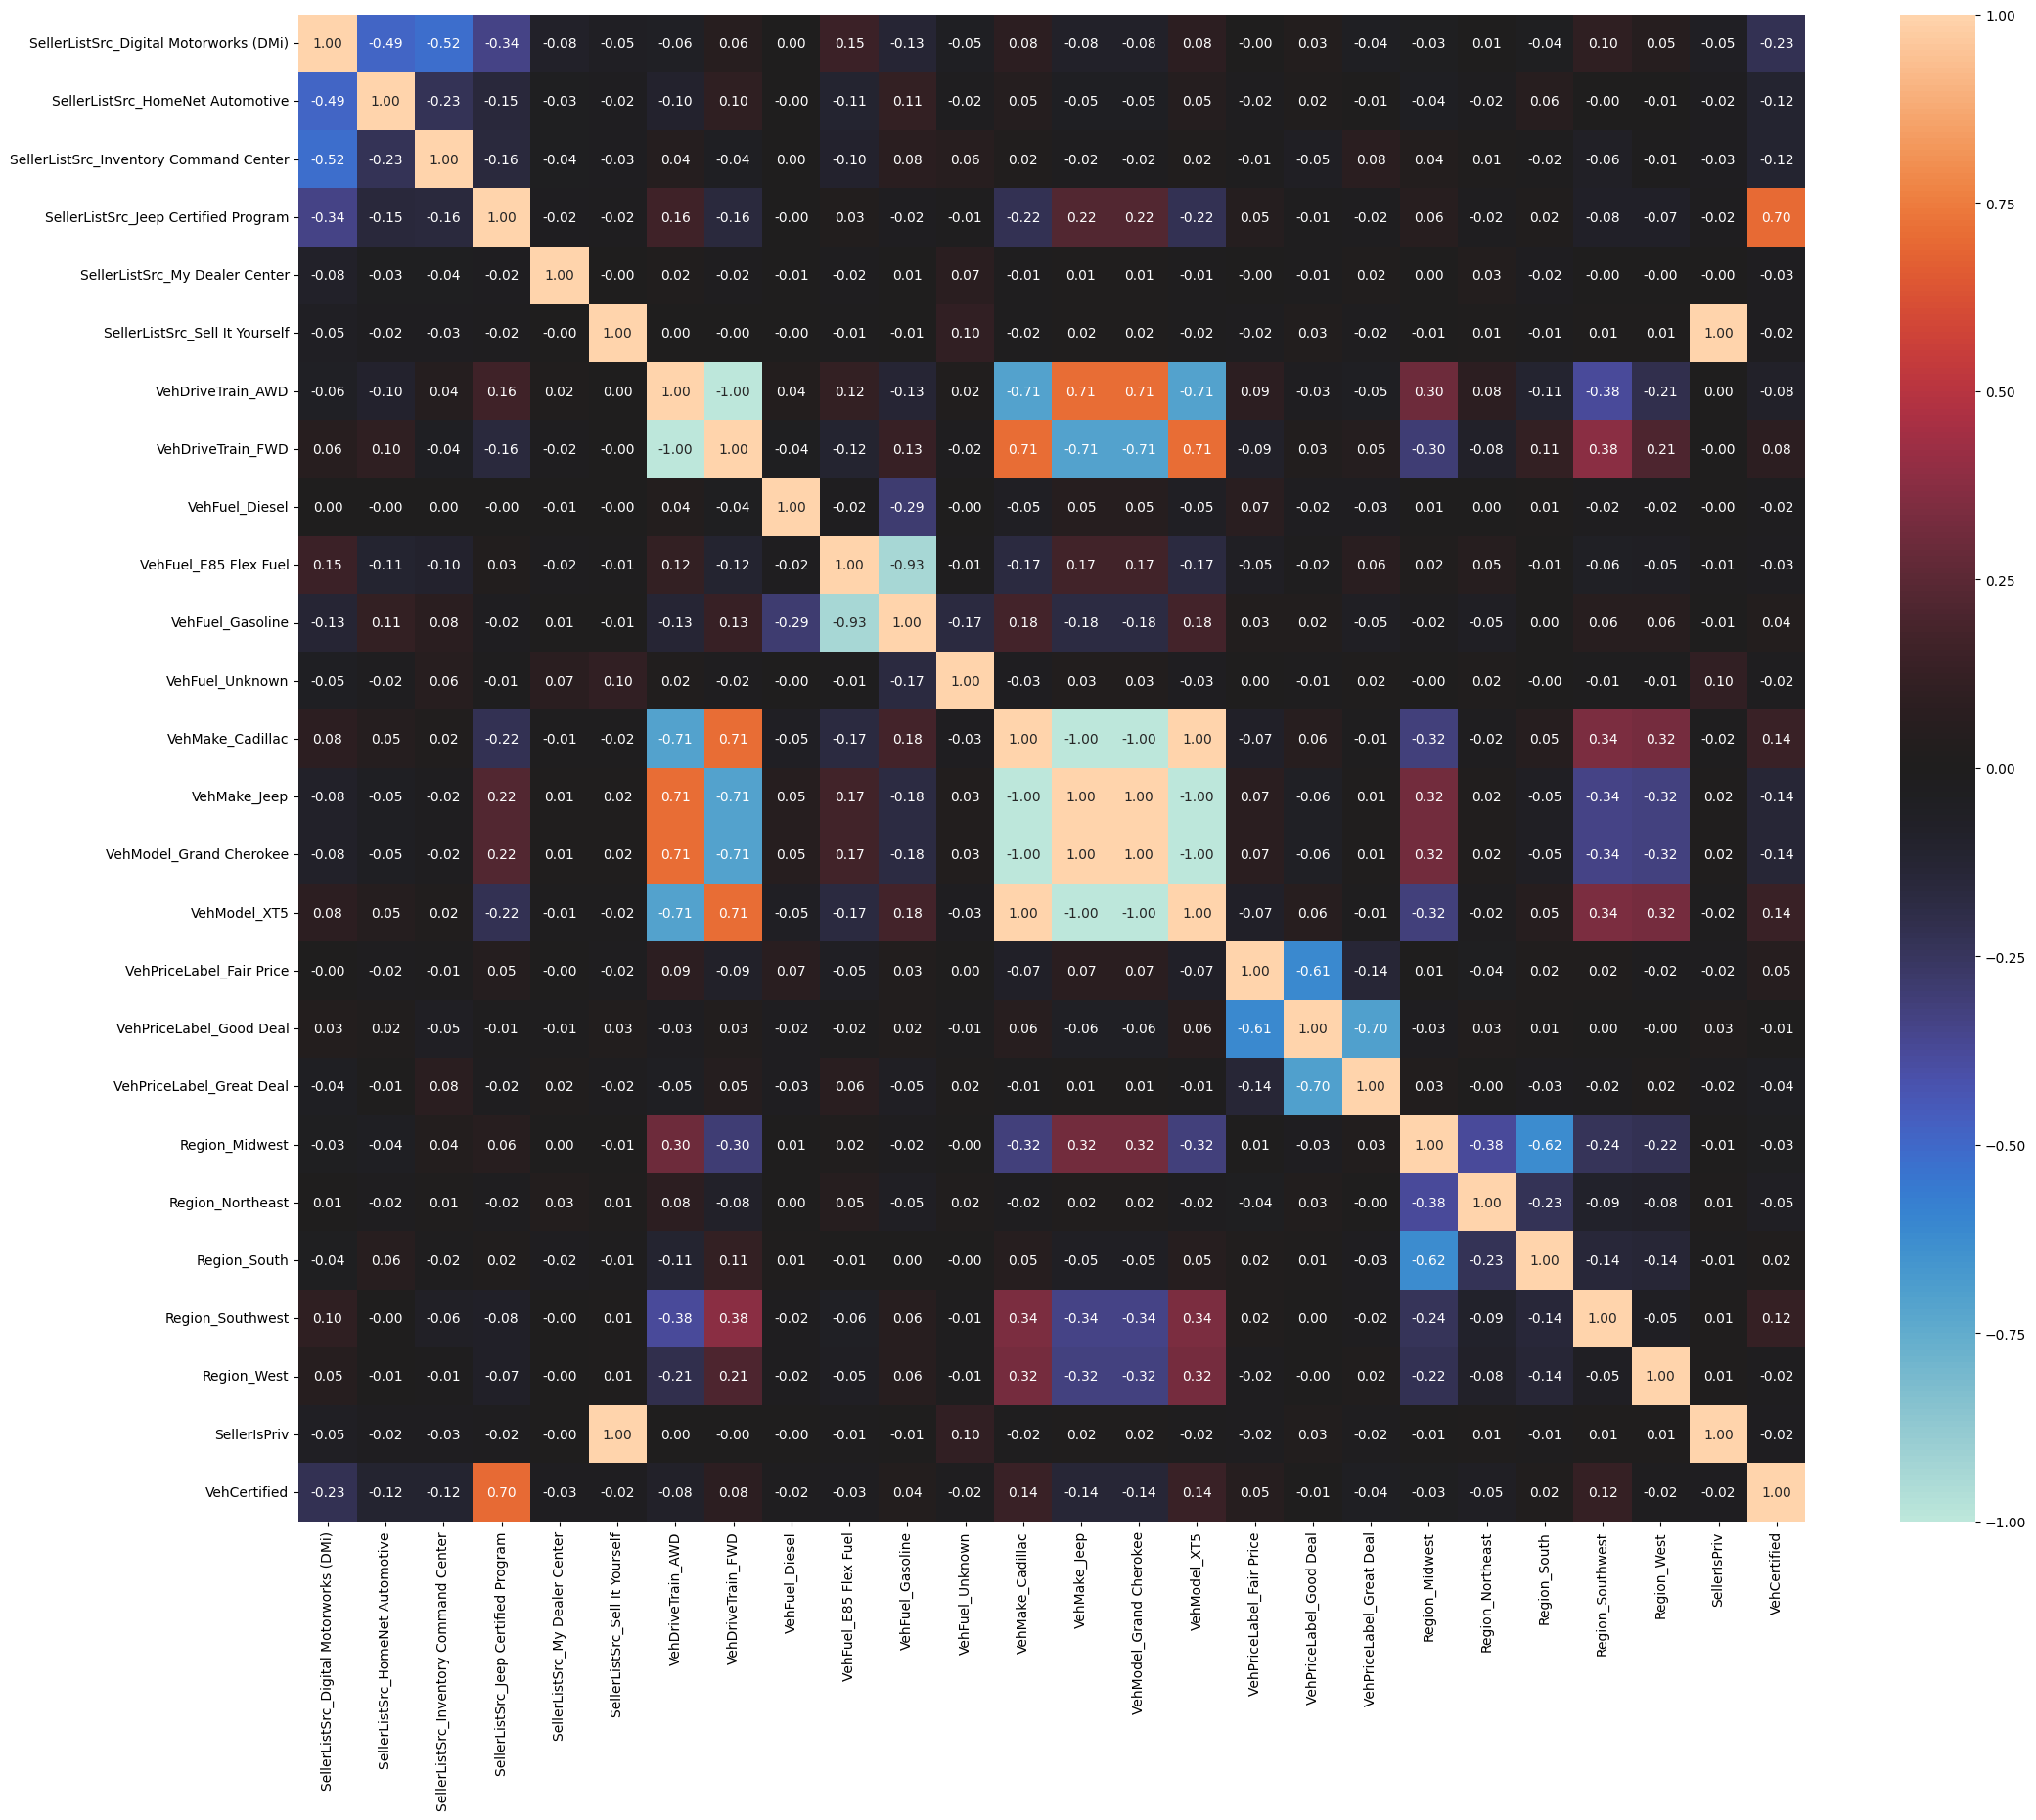

In [171]:
from dython.nominal import associations

cat_corr_X = X_train.iloc[:,:-5]

categorical_correlation= associations(cat_corr_X, filename= 'categorical_correlation.png', figsize=(25,20))

## 1.8 Final List of Features

In [314]:
feature_list = ['VehMileage','VehMake_Jeep','VehListdays','SellerRevCnt','SellerRating','VehPriceLabel_Great Deal','VehPriceLabel_Fair Price','SellerListSrc_HomeNet Automotive']

In [173]:
##build the base model on Train data on all features , test the predictions, post that do hyperparameter tuning and cross validation

In [175]:
predictions_base = base_model.predict(X_test)

In [176]:
# evaluate predictions
roc_auc_sc_base = roc_auc_score(y_test, predictions_base)

## 1.9 Cross validation set roc auc score

In [183]:
from sklearn.model_selection import cross_val_score,KFold
kf_base=KFold(n_splits=15)
score_base=cross_val_score(base_model,X_train,y_train,scoring='roc_auc',cv=kf)

In [184]:
print("roc_auc score on cross validation set :{:.2f}%".format(score_base.mean()*100))
print("roc_auc score on test set : %.2f%%" % (roc_auc_sc_base * 100.0))

roc_auc score on cross validation set :90.31%
roc_auc score on test set : 83.49%


## 2.1  CLASS BALANCING APPROACH using SMOTE package 

In [214]:
sm = SMOTE(random_state = 2)
X_train1,y_train1 = sm.fit_resample(X_train,y_train)

In [218]:
##Comparing the distribution of records in Target variable column between Exited and Non-exited individuals in **inbalanced Vs balanced** dataset

print('In imbalanced training data the distribution of non exited customers to exited customers is as follows:')
pd.Series(y_train['Vehicle_Trim']).value_counts()

In imbalanced training data the distribution of non exited customers to exited customers is as follows:


1    2092
0    2033
Name: Vehicle_Trim, dtype: int64

In [219]:
print('In balanced training data the distribution of non exited customers to exited customers is as follows:')
pd.Series(y_train1['Vehicle_Trim']).value_counts()

In balanced training data the distribution of non exited customers to exited customers is as follows:


1    2092
0    2092
Name: Vehicle_Trim, dtype: int64

## 2.1 Hyper Parameter Tuning 

In [230]:
base_rfm = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [300, 350, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'min_samples_leaf' : [3,4],
    'criterion' :['gini', 'entropy']
}

In [231]:
# cv_rfm = GridSearchCV(estimator=base_rfm, param_grid=param_grid, cv= 5)
# cv_rfm.fit(X_train1[feature_list], y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4],
                         'n_estimators': [300, 350, 400, 500]})

## 2.1 Fit the model on the Training data based on the tuned hyper parameters

In [233]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=6, min_samples_leaf= 3 , criterion='gini')

In [234]:
rfc1.fit(X_train[feature_list],y_train)

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=3,
                       n_estimators=500, random_state=42)

## 2.2 Cross-validation set roc_auc score

In [235]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=15)
score=cross_val_score(rfc1,X_train[feature_list],y_train,scoring='roc_auc',cv=kf)

print("Average Cross Validation roc_auc score is :{:.2f}%".format(score.mean()*100))

Average Cross Validation roc_auc score is :87.65%


## 2.3  Model Performance on Test Data using Random Forest

In [236]:
predictions = rfc1.predict(X_test[feature_list])
# evaluate predictions
roc_auc_sc = roc_auc_score(y_test, predictions)

#print('Accuracy on train set containing balanced data : {:.2f}%'.format(rfc1.score(X_train[feature_list], y_train)*100))
print("roc_auc score on test set : %.2f%%" % (roc_auc_sc * 100.0))

roc_auc score on test set : 81.96%


### 2.3.1 Confusion Matrix

In [237]:
# actual values
actual = y_test.values.tolist()
# predicted values
predicted = predictions.tolist()

# confusion matrix
con_matrix = confusion_matrix(actual,predicted, labels=[0,1])
print('Confusion matrix : \n',con_matrix)

Confusion matrix : 
 [[552 289]
 [ 16 911]]


### 2.3.2 Classification Report

In [238]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("\nTPR or Sensitivity or Recall is {:.2f}".format(tp/(tp+fn)),"\nPrecision is {:.2f}".format(tp/(tp+fp)), "\nFNR is {:.2f}".format(fn/(fn+tp)),"\nFPR or (1-Specificity) is {:.2f}".format(fp/(fp+tn)),"\nTNR is {:.2f}".format(tn/(tn+fp),"\nPrecision is {:.2f}".format(tp/(tp+fp))))


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('\nClassification report : \n',matrix)


TPR or Sensitivity or Recall is 0.98 
Precision is 0.76 
FNR is 0.02 
FPR or (1-Specificity) is 0.34 
TNR is 0.66

Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.98      0.86       927
           0       0.97      0.66      0.78       841

    accuracy                           0.83      1768
   macro avg       0.87      0.82      0.82      1768
weighted avg       0.86      0.83      0.82      1768



### 2.3.3  Confusion Matrix Plot for Logistic Regression Model

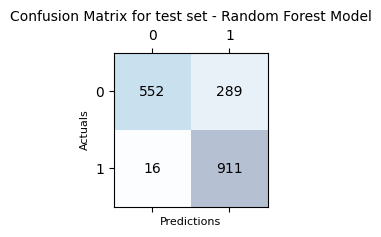

In [239]:
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(con_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(con_matrix.shape[0]):
    for j in range(con_matrix.shape[1]):
        ax.text(x=j, y=i,s=con_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=8)
plt.ylabel('Actuals', fontsize=8)
plt.title('Confusion Matrix for test set - Random Forest Model', fontsize=10)
plt.show()

## 2.3.4  ROC AUC score on test data

The roc_auc score is: 0.8195507480050847


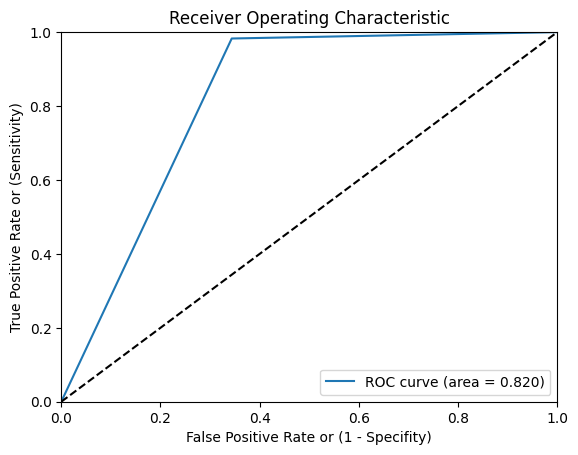

In [240]:
# Compute fpr, tpr, thresholds and roc auc

fpr, tpr, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)
gini_coefficient = (2*roc_auc)-1

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


print('The roc_auc score is:', roc_auc)

## Load the Test Dataset (where `Veh_Trim` column needs to be filled using the above model)

In [288]:
df_test = pd.read_csv(os.path.join(path_d,'Test_DataSet.csv'))

In [289]:
df_test.head(2)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear
0,8622015,Seneca,False,HomeNet Automotive,Lake Keowee Chrysler Dodge Jeep Ram,2.5,59,SC,29678,SUV,...,"1 Owner, Non-Personal Use Reported, Buyback Pr...",143.991262,Cadillac,13625.0,XT5,Good Deal,Thank you for visiting another one of Lake Keo...,Used,8-Speed Automatic,2018
1,8625693,Bedford,False,Inventory Command Center,North Coast Auto Mall,4.7,2116,OH,44146,SUV,...,"1 Owner, Accident(s) Reported, Non-Personal Us...",138.770486,Jeep,42553.0,Grand Cherokee,Good Deal,This 2017 Jeep Grand Cherokee 4dr Limited 4x4 ...,Used,8-Speed Automatic,2017


In [290]:
df_test.isna().sum()

ListingID            0
SellerCity           0
SellerIsPriv         0
SellerListSrc        0
SellerName           0
SellerRating         0
SellerRevCnt         0
SellerState          0
SellerZip            0
VehBodystyle         0
VehCertified         0
VehColorExt          7
VehColorInt        108
VehDriveTrain       64
VehEngine           58
VehFeats            37
VehFuel              0
VehHistory          27
VehListdays          0
VehMake              0
VehMileage           1
VehModel             0
VehPriceLabel       38
VehSellerNotes      41
VehType              0
VehTransmission     27
VehYear              0
dtype: int64

In [291]:
## Prepare the data along with imputation of missing values and one hot encoding of certain variables. Finally select the list of variables used for final model building and predict the values

#### Data Manipulation

In [292]:
df_test_r = sellerstate(df_test)
df_test_r.shape

(1000, 27)

In [293]:
df_test_r = sellerisPriv(df_test_r)
df_test_r.head(2)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerZip,VehBodystyle,VehCertified,...,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Region
0,8622015,Seneca,0,HomeNet Automotive,Lake Keowee Chrysler Dodge Jeep Ram,2.5,59,29678,SUV,False,...,143.991262,Cadillac,13625.0,XT5,Good Deal,Thank you for visiting another one of Lake Keo...,Used,8-Speed Automatic,2018,South
1,8818148,Florence,0,Inventory Command Center,King Cadillac Buick GMC,4.7,21,29502,SUV,False,...,247.506204,Cadillac,19991.0,XT5,Good Deal,PLEASE CALL NICKY MOORE INTERNET SALES MANAGER...,Used,8-Speed Shiftable Automatic,2018,South


In [294]:
df_test_r = vehcertified(df_test_r)
df_test_r.head(2)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerZip,VehBodystyle,VehCertified,...,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Region
0,8622015,Seneca,0,HomeNet Automotive,Lake Keowee Chrysler Dodge Jeep Ram,2.5,59,29678,SUV,0,...,143.991262,Cadillac,13625.0,XT5,Good Deal,Thank you for visiting another one of Lake Keo...,Used,8-Speed Automatic,2018,South
1,8818148,Florence,0,Inventory Command Center,King Cadillac Buick GMC,4.7,21,29502,SUV,0,...,247.506204,Cadillac,19991.0,XT5,Good Deal,PLEASE CALL NICKY MOORE INTERNET SALES MANAGER...,Used,8-Speed Shiftable Automatic,2018,South


In [295]:
df_test_r = vehdrivetrain(df_test_r)
df_test_r.head(2)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerZip,VehBodystyle,VehCertified,...,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Region
0,8622015,Seneca,0,HomeNet Automotive,Lake Keowee Chrysler Dodge Jeep Ram,2.5,59,29678,SUV,0,...,143.991262,Cadillac,13625.0,XT5,Good Deal,Thank you for visiting another one of Lake Keo...,Used,8-Speed Automatic,2018,South
1,8818148,Florence,0,Inventory Command Center,King Cadillac Buick GMC,4.7,21,29502,SUV,0,...,247.506204,Cadillac,19991.0,XT5,Good Deal,PLEASE CALL NICKY MOORE INTERNET SALES MANAGER...,Used,8-Speed Shiftable Automatic,2018,South


In [296]:
df_test_r = vehTenure(df_test_r)
df_test_r.head(2)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerZip,VehBodystyle,VehCertified,...,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,Region,VehTenure
0,8622015,Seneca,0,HomeNet Automotive,Lake Keowee Chrysler Dodge Jeep Ram,2.5,59,29678,SUV,0,...,143.991262,Cadillac,13625.0,XT5,Good Deal,Thank you for visiting another one of Lake Keo...,Used,8-Speed Automatic,South,5
1,8818148,Florence,0,Inventory Command Center,King Cadillac Buick GMC,4.7,21,29502,SUV,0,...,247.506204,Cadillac,19991.0,XT5,Good Deal,PLEASE CALL NICKY MOORE INTERNET SALES MANAGER...,Used,8-Speed Shiftable Automatic,South,5


In [297]:
## Consider only the set of columns initially selected after setting the index as ListingID

In [298]:
df_test_r = df_test_r[['ListingID','SellerIsPriv', 'SellerListSrc', 'VehCertified', 'VehDriveTrain',\
               'VehFuel', 'VehMake', 'VehModel', 'VehPriceLabel', 'VehMileage',\
               'SellerRating', 'SellerRevCnt', 'VehListdays', 'VehTenure', 'Region']]
df_test_r['Vehicle_Trim'] = np.nan

#### Missing Values Treatment

In [299]:
df_test_revised= missing_vcat(df_test_r,'SellerListSrc')

df_test_revised = missing_vcat(df_test_r,'VehDriveTrain')

df_test_revised = missing_vcat(df_test_r,'VehFuel')

df_test_revised = missing_vcat(df_test_r,'VehPriceLabel')

df_test_revised = missing_vcont(df_test_r,'VehMileage')

df_test_revised= missing_vcont(df_test_r,'VehListdays')

df_test_revised.head()

,ListingID,SellerIsPriv,SellerListSrc,VehCertified,VehDriveTrain,VehFuel,VehMake,VehModel,VehPriceLabel,VehMileage,SellerRating,SellerRevCnt,VehListdays,VehTenure,Region,Vehicle_Trim
0,8622015,0,HomeNet Automotive,0,FWD,Gasoline,Cadillac,XT5,Good Deal,13625.0,2.5,59,143.991262,5,South,NaN
1,8818148,0,Inventory Command Center,0,FWD,Gasoline,Cadillac,XT5,Good Deal,19991.0,4.7,21,247.506204,5,South,NaN
2,9154630,0,HomeNet Automotive,0,AWD,Gasoline,Jeep,Grand Cherokee,Good Deal,25890.0,3.7,520,32.678773,8,South,NaN
3,9202906,0,HomeNet Automotive,0,FWD,Gasoline,Cadillac,XT5,Good Deal,11310.0,3.7,520,82.489109,6,South,NaN
4,9209502,0,Inventory Command Center,0,AWD,Gasoline,Jeep,Grand Cherokee,Fair Price,24343.0,1.4,41,33.314317,6,South,NaN


In [300]:
df_test_revised.isna().sum()

ListingID           0
SellerIsPriv        0
SellerListSrc       0
VehCertified        0
VehDriveTrain       0
VehFuel             0
VehMake             0
VehModel            0
VehPriceLabel       0
VehMileage          0
SellerRating        0
SellerRevCnt        0
VehListdays         0
VehTenure           0
Region              0
Vehicle_Trim     1000
dtype: int64

#### One hot encoding treatment

In [307]:
sls_dummy_test = get_dummies(df_test_revised, 'SellerListSrc')
vdt_dummy_test = get_dummies(df_test_revised, 'VehDriveTrain')
vf_dummy_test = get_dummies(df_test_revised, 'VehFuel')
vm_dummy_test = get_dummies(df_test_revised, 'VehMake')
vmo_dummy_test = get_dummies(df_test_revised, 'VehModel')
vp_dummy_test = get_dummies(df_test_revised, 'VehPriceLabel')
r_dummy_test = get_dummies(df_test_revised, 'Region')


df_model_test = pd.concat([df_test_revised['ListingID'],sls_dummy_test, vdt_dummy_test, vf_dummy_test, vm_dummy_test, vmo_dummy_test, vp_dummy_test, r_dummy_test, df_test_revised[['SellerIsPriv', 'VehCertified', 'VehMileage', 'SellerRating', 'SellerRevCnt', 'VehListdays', 'VehTenure','Vehicle_Trim']]], axis=1)

df_model_test.head()

,ListingID,SellerListSrc_Cadillac Certified Program,SellerListSrc_Digital Motorworks (DMi),SellerListSrc_HomeNet Automotive,SellerListSrc_Inventory Command Center,SellerListSrc_Jeep Certified Program,SellerListSrc_My Dealer Center,SellerListSrc_Sell It Yourself,VehDriveTrain_ALL-WHEEL DRIVE,VehDriveTrain_AWD,...,Region_Southwest,Region_West,SellerIsPriv,VehCertified,VehMileage,SellerRating,SellerRevCnt,VehListdays,VehTenure,Vehicle_Trim
0,8622015,0,0,1,0,0,0,0,0,0,...,0,0,0,0,13625.0,2.5,59,143.991262,5,NaN
1,8818148,0,0,0,1,0,0,0,0,0,...,0,0,0,0,19991.0,4.7,21,247.506204,5,NaN
2,9154630,0,0,1,0,0,0,0,0,1,...,0,0,0,0,25890.0,3.7,520,32.678773,8,NaN
3,9202906,0,0,1,0,0,0,0,0,0,...,0,0,0,0,11310.0,3.7,520,82.489109,6,NaN
4,9209502,0,0,0,1,0,0,0,0,1,...,0,0,0,0,24343.0,1.4,41,33.314317,6,NaN


### Final Predictions for the variable `Vehicle_Trim`

In [308]:
final_predictions_VT = rfc1.predict(df_model_test[feature_list])

In [309]:
df_model_test['Vehicle_Trim'] = final_predictions_VT.tolist()

In [310]:
df_model_test.Vehicle_Trim.unique()

array([0, 1], dtype=int64)

In [311]:
df_model_test['Vehicle_Trim'] = df_model_test['Vehicle_Trim'].map({0:'Luxury++',1:'Limited'})

In [312]:
df_model_test.head()

,ListingID,SellerListSrc_Cadillac Certified Program,SellerListSrc_Digital Motorworks (DMi),SellerListSrc_HomeNet Automotive,SellerListSrc_Inventory Command Center,SellerListSrc_Jeep Certified Program,SellerListSrc_My Dealer Center,SellerListSrc_Sell It Yourself,VehDriveTrain_ALL-WHEEL DRIVE,VehDriveTrain_AWD,...,Region_Southwest,Region_West,SellerIsPriv,VehCertified,VehMileage,SellerRating,SellerRevCnt,VehListdays,VehTenure,Vehicle_Trim
0,8622015,0,0,1,0,0,0,0,0,0,...,0,0,0,0,13625.0,2.5,59,143.991262,5,Luxury++
1,8818148,0,0,0,1,0,0,0,0,0,...,0,0,0,0,19991.0,4.7,21,247.506204,5,Luxury++
2,9154630,0,0,1,0,0,0,0,0,1,...,0,0,0,0,25890.0,3.7,520,32.678773,8,Limited
3,9202906,0,0,1,0,0,0,0,0,0,...,0,0,0,0,11310.0,3.7,520,82.489109,6,Luxury++
4,9209502,0,0,0,1,0,0,0,0,1,...,0,0,0,0,24343.0,1.4,41,33.314317,6,Limited


In [313]:
final_df_VT = df_model_test[['ListingID','Vehicle_Trim']].set_index('ListingID')
final_df_VT.to_excel(r'C:\Users\souma\Documents\boeing_ds\Output\vehicle_trim_pred.xlsx')